# Part 1

### Main Point: It is the responsiblity of individuals to become data-literate and be able to sieve stories out of data sets. 

### Tools for data analysis:
1. [Open Data Philly](https://www.opendataphilly.org)
2. [Pandas from PyData](https://pandas.pydata.org)
3. codebooks for data sets - always have them handy

### Example of a Table in Markdown (useful for later data representations form CSVs):

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>day_of_week</th>      <th>county_name</th>      <th>collision_type</th>      <th>dec_lat</th>      <th>dec_long</th>    </tr>  </thead>  <tbody>    <tr>      <td>3</td>      <td>Philadelphia</td>      <td>1</td>      <td>40.0446</td>      <td>-75.0547</td>    </tr>    <tr>      <td>5</td>      <td>Philadelphia</td>      <td>4</td>      <td>39.9693</td>      <td>-75.1432</td>    </tr>    <tr>      <td>7</td>      <td>Philadelphia</td>      <td>4</td>      <td>40.0490</td>      <td>-75.0707</td>    </tr>    <tr>      <td>6</td>      <td>Philadelphia</td>      <td>6</td>      <td>39.9034</td>      <td>-75.1504</td>    </tr>    <tr>      <td>4</td>      <td>Philadelphia</td>      <td>1</td>      <td>40.0512</td>      <td>-74.9892</td>    </tr>    <tr>      <td>6</td>      <td>Philadelphia</td>      <td>8</td>      <td>39.9352</td>      <td>-75.1542</td>    </tr>    <tr>      <td>4</td>      <td>Philadelphia</td>      <td>4</td>      <td>40.0811</td>      <td>-75.0391</td>    </tr>  </tbody></table>

### Pandas Commands for CSV's:
1. `pd.read_csv()` reads from a CSV and turns it into a `data frame` structure.
2. `data frane` has rows, columns, and indices for access. 
3. `crash_data = pd.read_csv('data/crash_data_collision_crash_2007_2017.csv')`
4. pandas `data frame` is an object with: 
    - attributes
        - `.shape` is dimensions of object. row then col. 
        - `.columns` tells us names of all columns
            - `.sort_values()` available for this pandas index 
    - functions
        - `.head()` displays first n rows of frame (n=5 default)
        - `.tail()` displays last n rows of frame (n=5 default)
        - `.sample(n)` selects random sampling of n rows of data
4. good practice to put headings into a code book csv and load it in. 
    - our is `code_book`


In [22]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

crash_data = pd.read_csv('data/crash_data_collision_crash_2007_2017.csv')

type(crash_data) # verify it's a data frame

print(crash_data.shape) # dimensions

crash_data.head(10) # here n = 5

crash_data.tail() # last 5 rows

crash_data.sample(2) # ransom sample of 2 rows

crash_data.columns # use names for indexing. 
crash_data.columns.sort_values()

# code book for data
code_book = pd.read_csv('data/data_codebook.csv')
code_book # ok but who makes the code book lmao
code_book.head(15) # first 15 rows, 0-14
code_book.iloc[14] # 15th row, 14th index info


(77462, 90)


Column_Name                                  CRN
Short_Description            Crash Record Number
Type                                      NUMBER
Length                                         2
Constraints          *Key to data base records *
Name: 14, dtype: object

### Understanding the Data using Pandas:

Use *INDEXING* to drive your understanding of the data:

1. akwasy check raw data values yourself
2. you can group by sunsets with :
    - .groupby(FIELD) function will split a single DataFrame into a number of different ones based on the values of the grouping field or fields.
 

2011 (9941, 90)
2012 (11281, 90)
2013 (11072, 90)
2014 (10565, 90)
2015 (11453, 90)
2016 (12137, 90)
2017 (11013, 90)


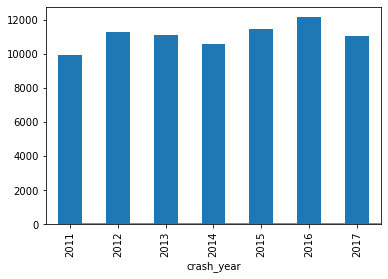

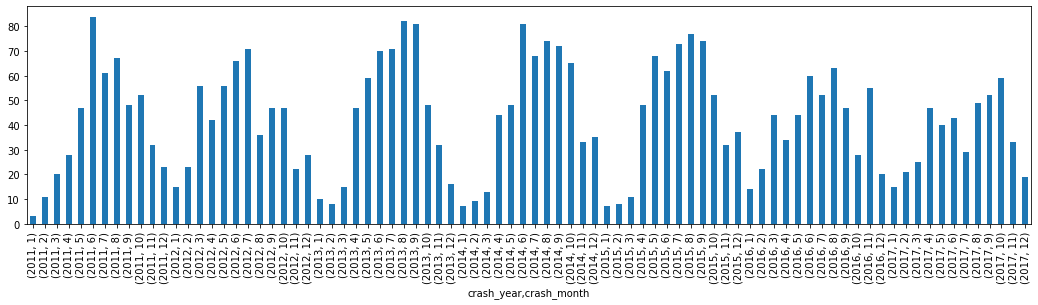

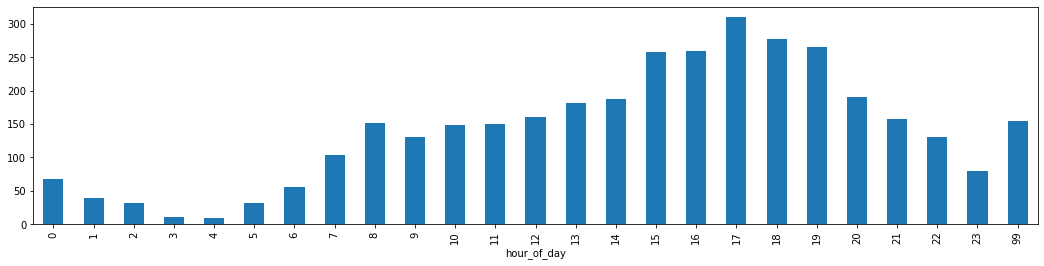

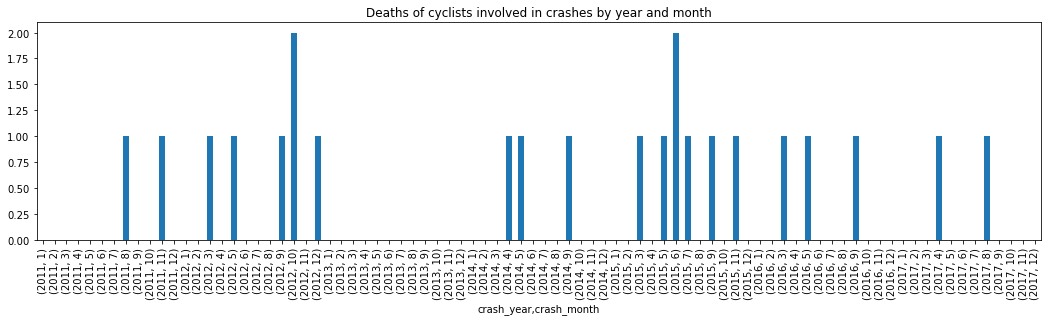

In [55]:
# index search by column name, gives index and then column value at the index
crash_data['fatal_count']

# visualize crash data with a built in plot
# x values range from 0 to 77,641 and give fatal count
# doesnt tell a full story
crash_data['fatal_count'].plot()

# it's easier to tabulate data with a value count function.
# we now see most were = 0 and only 2 = 4 deaths in 10 years
crash_data['fatal_count'].value_counts()

#type(crash_data['fatal_count']) # so pandas series have value_counts

crash_data['fatal_count'].describe() # when data is continuous

crash_data['crash_year'].head() # column vlas treated as integer, thus
crash_data['crash_year'].value_counts() # discrete analysis gives us good vlues
crash_data['crash_year'].describe() # contunuous analysis gives us weird values
# takeaway - always check data vlaues yourself!

crash_data['crash_year'].astype('category').head(15) # treat years as categories
crash_data['crash_year'].astype('category').describe() # now cont analysis makes a little more sense

# group by subset crash year. 
# show shape of dataframe corresponding to each yearly subset
for year, ydf in crash_data.groupby('crash_year'):
    print(year, ydf.shape)


# access crn = crash recorded number of crash_year, count it, and plot.   
# shows realtively even number of crashes each year
crash_data.groupby('crash_year')['crn'].count().plot(kind='bar')

# group by more than one field..
# and count
crash_data.groupby(['crash_year','crash_month']).count()

# in subset grouped by crash year and then by crash month
# see how many bicylce involved accidents there were in that month, in that year
crash_data.groupby(['crash_year','crash_month'])['bicycle_count'].sum()

# to visualize the numbers descirbed abive, 
# seems like most bicylce involved crashes happen in the middle (summer) months!
plt.figure(figsize=(18,4))
crash_data.groupby(['crash_year','crash_month'])['bicycle_count'].sum().plot(kind='bar')

# it also seems like when the weather is colder there is less bicycl crashes,
# especially in the early morning cold
# but it might be related to rush hour?
plt.figure(figsize=(18,4))
crash_data.groupby(['hour_of_day'])['bicycle_count'].sum().plot.bar()

# death of cyclists in crashes by month
plt.figure(figsize=(18,4))
bike_crash = crash_data[crash_data['bicycle_count']>0]
bike_crash.groupby(['crash_year','crash_month'])['fatal_count'].sum().plot(kind='bar', title='Deaths of cyclists involved in crashes by year and month')



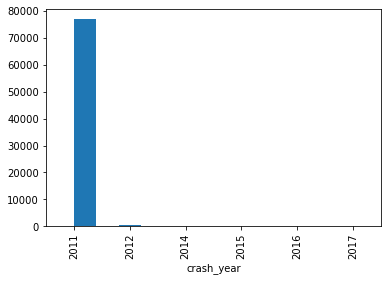

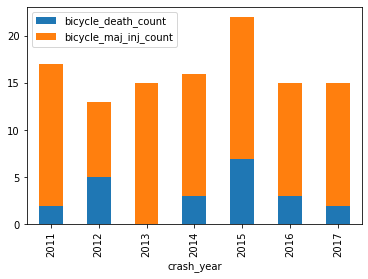

In [67]:
# now lets get distribution of fatalities across all types of crashes
crash_data['fatal_count'].value_counts()
crash_data['fatal_count'].hist() # here table is clearer than plot

# find all crahses where fatality = 2 exaclty
crash_data[crash_data['fatal_count']==2]

# lets look at the total bicycle deathcount
crash_data['bicycle_death_count'].value_counts()

#major injury counts for bikes
crash_data['bicycle_maj_inj_count'].value_counts()

# all crashes with bikes AND get the death count
crash_data[crash_data['bicycle_count']>0]['bicycle_death_count'].value_counts()

# all crashes with bikes AND get the major injury count
crash_data[crash_data['bicycle_count']>0]['bicycle_maj_inj_count'].value_counts()

# all crashes with bikes And group by crash year
# inside crash year, find the bike death count and make a bar graph
crash_data[(crash_data['bicycle_death_count']>0) ].groupby('crash_year')['bicycle_death_count'].sum().plot(kind='bar')

# all totoal bike injuries stored in a variable
bicycle_injuries = crash_data[(crash_data['bicycle_death_count']>0) | (crash_data['bicycle_maj_inj_count']>0)]
# group bicycle injuries by crash year, sum up the death ct and major injury ct
bicycle_injuries.groupby('crash_year')[['bicycle_death_count', 'bicycle_maj_inj_count']].sum().plot(stacked=True, kind='bar')


<ipython-input-70-6277a56c190f>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ped_accidents.groupby('crash_year')['ped_death_count', 'ped_maj_inj_count'].sum().plot(kind='bar', stacked=True)


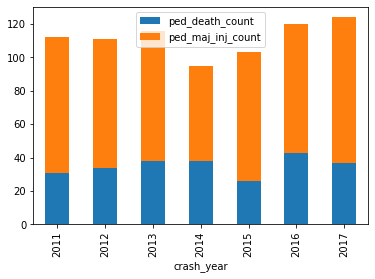

In [70]:
# all pedestrian accidents
ped_accidents = crash_data[crash_data['ped_count']>0]
# group pedestrian accidents by crash year, death ct and major inj count in bar graph as above with bikes
# seems more even than with bikes?
ped_accidents.groupby('crash_year')['ped_death_count', 'ped_maj_inj_count'].sum().plot(kind='bar', stacked=True)



### End:

Here are various links talking about the dangers of being a cyclist in Philly:
1. 
* https://www.phillytrib.com/news/local_news/philly-s-riskiest-deadliest-roads-in-black-and-brown-neighborhoods/article_1d03b88e-2edf-5cbd-9f42-dd5eddf8fedf.html

* https://usa.streetsblog.org/2018/02/12/philadelphias-boulevard-of-death/

* https://billypenn.com/2017/02/06/how-roosevelt-boulevard-became-the-most-dangerous-road-in-philadelphia/

* KnowPA - infoviz example dashboards - http://www.knowpa.com/

https://www.hg.org/legal-articles/5-of-the-most-dangerous-roads-in-the-u-s--32057

> Pennsylvania roads are dangerous, and with its large concentration of population, Philadelphia has the greatest number of crash-related deaths. In fact, according to PennDOT data on fatal car accidents, Philadelphia had more than a quarter of the road segments that were among the state’s most deadly from 2015-2017. During this period, Philly had 24 road segments with 155 total fatal collisions, leading to 167 deaths. This amounted to about a third of the segments with at least four deaths in the entire state.

https://www.wnwlaw.com/philly-four-pennsylvanias-ten-deadliest-roads/


* Study by law firm

https://www.dallashartman.com/blog/2019/01/deadly-roads-pa/

# Part 2:


### Built-In Python Methods:
    - `print`
    - `len`
    - `type`
    - `dir` : new to me! lists the features and methods of the object.
    - `help`
 
### Good Book
- good book for class is "Data Literacy Fundamentals" and "Avoiding Pitfalls with Data"
- it goes Data -> Information -> Knowledge -> Wisdom

### Useful Commands:
- String Commands:
    - `.upper()` send to upper case
    - `.lower()` send to lower case
    - `title()` send to title case
    - `.startswith('starts with this?')` T is string starts with string, F otherwise.
    - `.endswith('str')` analogue to above with ends with
    - `.isLower()` T if all string in lowercase, F otherwise
    - `.strip` return copy of string with trailing and leading whitespace removed
    - see `dir` for a ton more. 
    - use `help(name_of_str.fun_I_call())` to see exact specs of function. 
- very handy command to insert into print fun!
    - `print(f'The largest value in the dataset is { max(y) }')`
    - `print(f'The smallest value in the dataset is { min(y) }')`
```python
plt.plot(x,y, 'o') # points
#plt.plot(x,y, '-') # line
#plt.plot(x,y, '-o') # line with pts?
plt.show()
```


In [74]:
n = "hello"
help(n.strip)
help(n.translate)


Help on built-in function strip:

strip(chars=None, /) method of builtins.str instance
    Return a copy of the string with leading and trailing whitespace removed.
    
    If chars is given and not None, remove characters in chars instead.

Help on built-in function translate:

translate(table, /) method of builtins.str instance
    Replace each character in the string using the given translation table.
    
      table
        Translation table, which must be a mapping of Unicode ordinals to
        Unicode ordinals, strings, or None.
    
    The table must implement lookup/indexing via __getitem__, for instance a
    dictionary or list.  If this operation raises LookupError, the character is
    left untouched.  Characters mapped to None are deleted.



Important integer functions:
1. dir(int) to give you a ton of functions on int. 
2. looks like ints in python can be complex - has conjugate operation.
3. Other funs:
    - `bin(n)` converts to binary

In [81]:
# looks like complex functions built into int
n = 4
dir(int)

help(n.bit_length)

Help on built-in function bit_length:

bit_length() method of builtins.int instance
    Number of bits necessary to represent self in binary.
    
    >>> bin(37)
    '0b100101'
    >>> (37).bit_length()
    6



### Lists
1. Noticed links are indexed BOTH by 0 to n-1 AND -(n-1) to 0
2. for slicing, syntax is:
    - `list_name[init_index:end_index]`
3. when you have int list, theres these functions:
    - sum(list)
    - min(list)
    - max(list)